In [2]:
!pip3 install bokeh
!pip3 install plotly
!pip3 install geopandas

In [3]:
# imports
import numpy as np
import pandas as pd
import json
import os

# plotly packages
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *
import plotly.graph_objects as go

import seaborn as sns

import geopandas as gpd

In [4]:
data = pd.read_csv('caso_full.csv')
data.head()
data.shape

(3853648, 18)

In [5]:
data.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
3853643,Tupirama,1721257.0,2022-03-27,202213,1922.0,1891.0,False,True,223,11602.49740,2021-12-08,0.0090,2,674,city,TO,0,0
3853644,Tupiratins,1721307.0,2022-03-27,202213,2729.0,2671.0,False,True,199,7292.04837,2021-12-08,0.0151,3,674,city,TO,0,0
3853645,Wanderlândia,1722081.0,2022-03-27,202213,11734.0,11683.0,False,True,1433,12212.37430,2021-12-08,0.0147,21,699,city,TO,0,0
3853646,Xambioá,1722107.0,2022-03-27,202213,11520.0,11540.0,False,True,2458,21336.80556,2021-12-08,0.0146,36,688,city,TO,0,0
3853647,NaN,17.0,2022-03-27,202213,1590248.0,1572866.0,False,True,302502,19022.31602,2022-03-25,0.0137,4142,740,state,TO,0,0


In [59]:
data2=data.copy()

### Período escolhido para análise

In [212]:
print(min(data['date']))
print(max(data['date']))

2020-02-25
2022-03-27


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

In [225]:
data2.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,3.840002e+06,3.853648e+06,3.840002e+06,3.840002e+06,3.853648e+06,3.824482e+06,3.853648e+06,3.853648e+06,3.853648e+06,3.853648e+06,3.853648e+06
mean,3.228321e+06,2.021052e+05,8.116488e+04,8.054619e+04,4.777532e+03,5.984968e+03,2.650386e-02,1.296616e+02,3.442507e+02,1.385716e+01,3.307339e-01
std,1.009499e+06,5.755437e+01,9.057809e+05,8.992380e+05,6.180363e+04,5.358505e+03,4.975375e-02,1.901344e+03,1.992017e+02,2.606627e+02,6.263980e+00
min,1.100000e+01,2.020090e+05,7.760000e+02,7.810000e+02,0.000000e+00,2.160000e-03,0.000000e+00,0.000000e+00,1.000000e+00,-5.942900e+04,-4.070000e+02
25%,2.509107e+06,2.020440e+05,5.602000e+03,5.603000e+03,1.420000e+02,1.571626e+03,1.140000e-02,3.000000e+00,1.720000e+02,0.000000e+00,0.000000e+00
50%,3.144508e+06,2.021160e+05,1.219500e+04,1.213900e+04,4.800000e+02,4.675325e+03,1.970000e-02,9.000000e+00,3.440000e+02,0.000000e+00,0.000000e+00
75%,4.117297e+06,2.021400e+05,2.689900e+04,2.670000e+04,1.395000e+03,9.208211e+03,2.990000e-02,3.000000e+01,5.150000e+02,2.000000e+00,0.000000e+00
max,5.300108e+06,2.022130e+05,4.628933e+07,4.591905e+07,5.232374e+06,9.048099e+05,1.000000e+00,1.671100e+05,7.620000e+02,1.052000e+05,1.389000e+03


### Análise nulos

In [8]:
data2.isnull().sum()

city                                             20119
city_ibge_code                                   13646
date                                                 0
epidemiological_week                                 0
estimated_population                             13646
estimated_population_2019                        13646
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    29166
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

dentre as variáveis que serão utilizados ao longo do trabalho, a única que possui valores em branco é a "new_confirmed", porém a quantidade é pequena comparada ao tamanho do dataset e ela será utilizada apenas para análises mais generalistas                             

### Quantidade de casos confirmados e mortes (p/ dia)

In [112]:
df2 = data2.groupby(['date'], as_index=False)[['new_confirmed', 'estimated_population', 'last_available_confirmed']].agg('sum')
df2.tail()

,date,new_confirmed,estimated_population,last_available_confirmed
757,2022-03-23,54522,423511384.0,53286086
758,2022-03-24,41526,423511384.0,53327612
759,2022-03-25,34030,423511384.0,53361642
760,2022-03-26,28677,423511384.0,53390319
761,2022-03-27,10311,423511384.0,53400630


### Evolução dos casos confirmados

In [12]:
fig = px.line(df2, x=df2['date'], y=df2['new_confirmed'])

fig.show()

### Evolução de casos acumulados 

In [129]:
fig = px.line(df2, x=df2['date'], y=df2['last_available_confirmed'])

fig.show()

### Análise da taxa de casos por população

Taxa de casos

In [31]:
#"{:.2f}%".format(taxa_casos_polulacao)

taxa_casos_polulacao = sum(df2['new_confirmed']) / df2[df2['date'] == max(df2['date'])]['estimated_population'] * 100

taxa_casos_polulacao

761    12.609019
Name: estimated_population, dtype: float64

Quantidade casos, mortes e taxa de crescimento por população por Estado em ordem decrescente de taxa

In [67]:
df3 = data2.groupby(['state'], as_index=False)[['new_confirmed']].agg('sum')

print(len(df3))

#df3['ultima_populacao_por_data'] = data2[data2['date'] == max(data2['date'])]['estimated_population']

#df3.sort_values(by=['Taxa de casos Populacional'], ascending=False).reset_index(drop=True)

dfnew = data2[data2['date'] == max(data2['date'])]
dfnew2=dfnew.groupby(['state'], as_index=False)[['estimated_population']].agg('sum')

dfnew2['new_confirmed']=df3['new_confirmed']

dfnew2['Taxa de Casos'] = (dfnew2['new_confirmed'] / dfnew2['estimated_population']) *100

dfnew2.sort_values(by=['Taxa de Casos'], ascending=False).reset_index(drop=True)

27


,state,estimated_population,new_confirmed,Taxa de Casos
0,RR,1262362.0,282818,22.403875
1,SC,14505004.0,3240759,22.342352
2,DF,6110298.0,1362758,22.302644
3,MT,7052440.0,1448117,20.533560
4,ES,8128104.0,1625618,19.999966
5,RS,22845946.0,4520273,19.785887
6,RO,3592920.0,657822,18.308841
7,PR,23033680.0,3956099,17.175280
8,TO,3180496.0,536615,16.872054
9,AP,1723546.0,285990,16.593117


### Dataset latitude e longitude

Usando dataframe para obter valor de Estado, Longitude e Latitude

In [78]:
import requests

arquivos={
    'uf': 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_UF_2021.zip',
}

for i in arquivos:
    arquivo = i+".zip"
    remote_url = arquivos[i]

    print("Coletando: "+remote_url)
    data = requests.get(remote_url)
    with open(arquivo, 'wb') as file:
        file.write(data.content)

Coletando: https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_UF_2021.zip


In [79]:
df = gpd.read_file('zip://uf.zip')
df.head()

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ..."


In [80]:
df.rename({'SIGLA':'state'},axis=1,inplace=True)

### Unindo tabela de coordenadas com a tabela de dados sobre covid

In [84]:
brasil = df.merge(dfnew2, on='state',how = 'left')

brasil

,CD_UF,NM_UF,state,NM_REGIAO,geometry,estimated_population,new_confirmed,Taxa de Casos
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...",3592920.0,657822,18.308841
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381...",1788940.0,211868,11.843214
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",8415428.0,1013658,12.045234
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045...",1262362.0,282818,22.403875
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ...",17381490.0,1484421,8.540240
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",1723546.0,285990,16.593117
6,17,Tocantins,TO,Norte,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...",3180496.0,536615,16.872054
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.66115 -2.98018, -44.66157 ...",14229196.0,777500,5.464118
8,22,Piauí,PI,Nordeste,"POLYGON ((-41.78076 -2.76078, -41.77935 -2.764...",6562960.0,735030,11.199672
9,23,Ceará,CE,Nordeste,"POLYGON ((-40.49582 -2.78541, -40.49242 -2.787...",18374206.0,2175146,11.838041


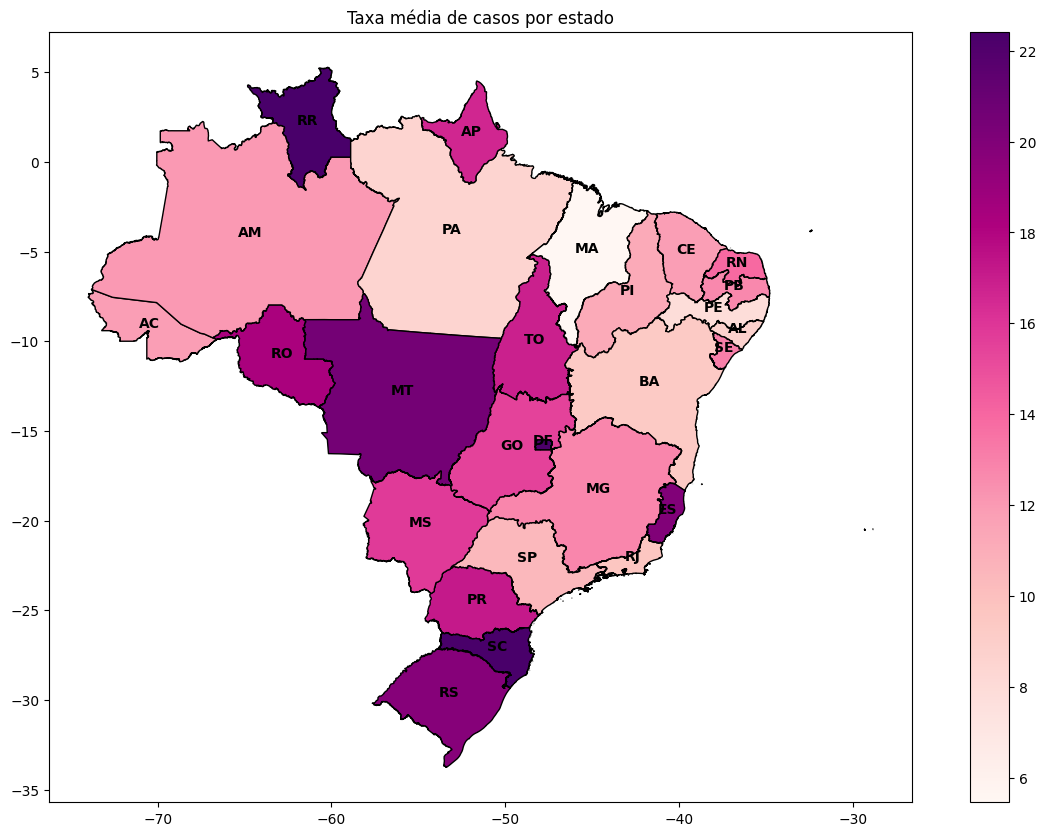

In [85]:
import matplotlib.pyplot as plt

fig,ax= plt.subplots(figsize=(15, 10))
brasil.plot(cmap='RdPu', legend = True, edgecolor='black', column='Taxa de Casos', categorical=False , ax=ax)

ax.set(title='Taxa média de casos por estado')

brasil.apply(lambda x: ax.annotate(text=x.state, xy=x.geometry.centroid.coords[0], ha='center', color = "black", weight='semibold'), axis=1)


plt.show()

### Correlação das variáveis

<Axes: >

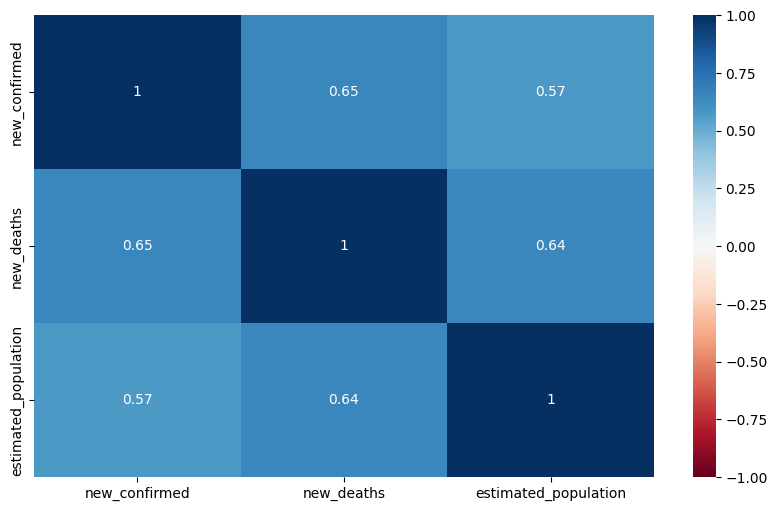

In [90]:
plt.figure(figsize = (10,6))

sns.heatmap(data2[['new_confirmed', 'new_deaths', 'estimated_population']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

Os valores próximos a 1 nas correlações entre as variáveis denotam forte associação positiva

### Modelos para previsão do valor de casos

### Modelo 1: Regressão linear

In [113]:
import plotly.graph_objects as go
import datetime
import numpy as np

df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.loc[df2['date'] >= '03-17-2020']
df2['dias'] = range(1,len(df2) + 1,1)

## Treino
dias_train = df2['dias'][:int(0.9*len(df2))]
cases_train = df2['last_available_confirmed'][:int(0.9*len(df2))]

## Teste
dias_test = df2['dias'][int(0.9*len(df2)):]
cases_test =  df2['last_available_confirmed'][int(0.9*len(df2)):]

previsao = len(df2) - len(dias_test)

print(f' Dados Totais: {len(df2)}')
print(f' Treino {len(dias_train)}')
print(f' Treino {len(dias_test)}')

 Dados Totais: 741
 Treino 666
 Treino 75


In [92]:
!pip install scikit-learn

In [114]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(dias_test.values.reshape(-1,1))

In [120]:
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['last_available_confirmed'][:int(0.9*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=dias_test, y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['last_available_confirmed'][int(0.9*len(df2)):], name = 'Casos Reais',mode="lines+markers")
])
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0= previsao + 0.5,
            y0=120,
            x1=previsao + 0.5,
            y1=max(df2['last_available_confirmed']),
            line=dict(
                width=1.5,
                dash= "dash"
            )
))

fig.add_trace(go.Scatter(
    x=[previsao + 0.5],
    y=[2],
    text=["Início da previsão"],
    mode="text",
))

fig.show()

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
print("Erro médio quadrático: ",mean_squared_error(cases_test,y_previsto))
print("R^2 Score: ", r2_score(cases_test,y_previsto))

Erro médio quadrático:  5947398113318.468
R^2 Score:  0.23569224257654464


### Entendendo possível exponencialidade dos dados

In [121]:
import plotly.graph_objects as go
import datetime
import numpy as np

df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.loc[df2['date'] >= '02-26-2020']
df2['dias'] = range(1,len(df2) + 1,1)
log_y_data = np.log(df2['last_available_confirmed'])


fig = go.Figure(data=[go.Scatter(name='log Casos',x=df2['dias'], y=log_y_data, mode='markers'),go.Scatter(name='Referência',x=df2['dias'], y=df2['dias'], line=dict(color='firebrick', width=0.5,
                              dash='dash'))])

fig.show()

### Modelo 2: exponencial

In [122]:
import plotly.graph_objects as go
import datetime
import numpy as np

log_y_data = np.log(df2['last_available_confirmed'])

cases_train_log = log_y_data[:int(0.9*len(df2))]
cases_test_log = log_y_data[int(0.9*len(df2)):]

print("Holdout: Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

Holdout: Dados Totais: 741, Treino: 666 dias, Teste: 75 dias


In [123]:
# Treino do modelo (interpolação da curva)
curve_fit = np.polyfit(dias_train, cases_train_log, 1)
y_train = (np.exp(curve_fit[1]) * np.exp(curve_fit[0]*dias_train)).astype(int)
y_estimado = (np.exp(curve_fit[1]) * np.exp(curve_fit[0]*dias_test)).astype(int)

In [124]:

fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['last_available_confirmed'][:int(0.9*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=dias_test, y=y_estimado, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['last_available_confirmed'][int(0.9*len(df2)):], name = 'Casos Reais',mode="lines+markers")
])

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0= previsao + 0.5,
            y0=120,
            x1=previsao + 0.5,
            y1=max(y_estimado),
            line=dict(
                width=1.5,
                dash= "dash"
            )
))


fig.add_trace(go.Scatter(
    x=[previsao + 0.5],
    y=[2],
    text=["Início da previsão"],
    mode="text",
))

fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Erro médio quadrático: ",mean_squared_error(cases_test_log,y_estimado))
print("R^2 Score: ", r2_score(cases_test_log,y_estimado))

### Modelo 3: Rede Neural Artificial Multi-Layer Perceptron

In [125]:
## Treino
dias_train = df2['dias'][:-1]
cases_train = df2['last_available_confirmed'][:-1]

## Teste
dias_test = df2['dias'][-1:]
cases_test =  df2['last_available_confirmed'][-1:]

previsao = len(df2) - len(dias_test)

print("Novo Holdout: Dados Totais: %d, Treino: %d dias, Teste: %d dia" % (len(df2),len(dias_train),len(dias_test)))

Novo Holdout: Dados Totais: 741, Treino: 740 dias, Teste: 1 dia


In [126]:
from sklearn.neural_network import MLPRegressor
# Treino da rede neural
mlp = MLPRegressor(hidden_layer_sizes=(200,200),activation='relu',solver='lbfgs',max_iter=1000, shuffle=True)
mlp.fit(X=dias_train.values.reshape(-1,1),y=cases_train.values.ravel())

MLPRegressor(hidden_layer_sizes=(200, 200), max_iter=1000, solver='lbfgs')

In [127]:
y_previsto = mlp.predict(dias_test.values.reshape(-1,1))

In [128]:
fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['last_available_confirmed'][:-1], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=dias_test, y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['last_available_confirmed'][-1:], name = 'Casos Reais',mode="lines+markers")
])
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0= previsao + 0.5,
            y0=120,
            x1=previsao + 0.5,
            y1=max(df2['last_available_confirmed']) + 100,
            line=dict(
                width=1.5,
                dash= "dash"
            )
))

fig.add_trace(go.Scatter(
    x=[previsao - 0.5],
    y=[2],
    text=["Início da previsão"],
    mode="text",
))

fig.show()

In [107]:
from sklearn.metrics import mean_absolute_error

print("Erro Médio Absoluto: {0:6.3f} casos".format(mean_absolute_error(cases_test,y_previsto)))

Erro Médio Absoluto: 106206.331 casos
